In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import seaborn as sns
import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
simplefilter("ignore", category=ConvergenceWarning)
%matplotlib inline

In [2]:
df = pd.read_csv('indicators_optimized.csv',index_col = 1, parse_dates= True)
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
df.head()

,open,high,low,close,volume,Chaikin_oscillator,MACD,williams_percentage,MFI,Stochastic_oscillator,Keltner_channels,CCI,target
timestamp,,,,,,,,,,,,,
2018-01-01,13850.49,13921.53,12877.67,13444.88,1.057522e+09,0,0,0,0,0,0,0,0
2018-01-02,13444.88,15306.13,12934.16,14754.13,1.956783e+09,1,-1,0,0,0,0,0,0
2018-01-03,14754.09,15435.01,14579.71,15156.62,1.604207e+09,1,-1,0,0,0,0,0,0
2018-01-04,15156.49,15408.66,14244.67,15180.08,1.656715e+09,1,-1,-1,0,0,0,0,1
2018-01-05,15180.08,17126.95,14832.36,16954.78,2.283989e+09,1,-1,-1,0,-1,-1,0,1


In [3]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Chaikin_oscillator', 'MACD',
       'williams_percentage', 'MFI', 'Stochastic_oscillator',
       'Keltner_channels', 'CCI', 'target'],
      dtype='object')

In [4]:
df.isnull().sum()

open                     0
high                     0
low                      0
close                    0
volume                   0
Chaikin_oscillator       0
MACD                     0
williams_percentage      0
MFI                      0
Stochastic_oscillator    0
Keltner_channels         0
CCI                      0
target                   0
dtype: int64

In [5]:
#le = LabelEncoder()
#df['timestamp'] = le.fit_transform(df['timestamp'])
#df['volume'] = le.fit_transform(df['volume'])
#
#df['close'] = le.fit_transform(df['close'])
#df['open'] = le.fit_transform(df['open'])
#df['high'] = le.fit_transform(df['high'])
#df['low'] = le.fit_transform(df['low'])

In [6]:
df

,open,high,low,close,volume,Chaikin_oscillator,MACD,williams_percentage,MFI,Stochastic_oscillator,Keltner_channels,CCI,target
timestamp,,,,,,,,,,,,,
2018-01-01,13850.49,13921.53,12877.67,13444.88,1.057522e+09,0,0,0,0,0,0,0,0
2018-01-02,13444.88,15306.13,12934.16,14754.13,1.956783e+09,1,-1,0,0,0,0,0,0
2018-01-03,14754.09,15435.01,14579.71,15156.62,1.604207e+09,1,-1,0,0,0,0,0,0
2018-01-04,15156.49,15408.66,14244.67,15180.08,1.656715e+09,1,-1,-1,0,0,0,0,1
2018-01-05,15180.08,17126.95,14832.36,16954.78,2.283989e+09,1,-1,-1,0,-1,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,28037.46,28650.47,27541.23,28477.29,1.436740e+09,1,-1,-1,-1,0,0,0,1
2023-04-01,28477.29,28810.95,28265.42,28465.30,5.632994e+08,1,-1,0,1,0,0,1,0
2023-04-02,28465.30,28538.36,27880.95,28186.76,5.925811e+08,-1,1,0,1,0,0,0,0


In [7]:
t = '2021-09-06'
X = df.drop(['target','open','high','low','close','volume'], axis=1)
y = df.target
# X = X.astype(int)
X_train = X.loc[:t]
y_train = y.loc[:t]

X_test = X.loc[t:]
y_test = y.loc[t:]

In [8]:
X_train.shape

(1345, 7)

In [9]:
model_params = {
    'svm': {
        'model': svm.SVC(),
        'params' : {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
             'gamma': ['scale', 'auto'],
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10, 50, 100, 200],
            # 'max_depth': [3, 5, 7, 9],
            # 'min_samples_split': [2, 5, 10],
            # 'min_samples_leaf': [1, 2, 4],
            # 'max_features': ['sqrt', 'log2']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
               'C': [0.1, 1, 10],
                # 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                # 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                # 'max_iter': [100, 500, 1000],
          
        }
    },
     'naive_bayes_gaussian': {
         'model': GaussianNB(),
         'params': {
              'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
         }
     },
    
     'decision_tree': {
         'model': DecisionTreeClassifier(),
         'params': {
             'max_depth': [None, 5, 10, 15, 20],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'max_features': [None, 'sqrt', 'log2'],
             'criterion': ['gini','entropy'],
            
         }
     },
     'gradient_boost':{
         'model': GradientBoostingClassifier(),
         'params':{
         "learning_rate": [0.001, 0.01, 0.1, 1],
         "n_estimators": [50, 100, 200, 300, 400, 500],
         "max_depth": [2, 3, 4, 5],
         }
     },     
     'adaboost':{
         'model': AdaBoostClassifier(),
         'params':{
         "learning_rate": [0.001, 0.01, 0.1, 1],
         'n_estimators': [50, 100, 200, 300, 400, 500],
         'algorithm': ['SAMME', 'SAMME.R']
         }
     }    
}


In [10]:
window = 365
n_splits = (df.loc[:t].shape[0] - window) // window
tscv = TimeSeriesSplit(n_splits=n_splits)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

In [11]:

scores = []
best_estimators = {}
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=tscv, return_train_score=False,n_jobs=-1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[model_name] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df.sort_values(by='best_score', ascending=False)

,model,best_score,best_params
5,gradient_boost,0.760045,"{'learning_rate': 0.01, 'max_depth': 2, 'n_est..."
6,adaboost,0.754464,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '..."
0,svm,0.753348,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}"
2,logistic_regression,0.752232,{'C': 10}
3,naive_bayes_gaussian,0.752232,{'var_smoothing': 1e-09}
4,decision_tree,0.752232,"{'criterion': 'entropy', 'max_depth': 15, 'max..."
1,random_forest,0.733259,{'n_estimators': 10}


In [12]:
results = pd.DataFrame()
features = {}
results_list = []
for k, v in best_estimators.items():
    model = best_estimators[k]
    model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results_list.append({'Model': k, 'Accuracy': accuracy, 
                          'Precision': precision, 
                          'Recall': recall,
                          'F1': f1
                         })

results = pd.concat([pd.DataFrame(res, index=[0]) for res in results_list], ignore_index=True)
results.sort_values(by='Accuracy', ascending=False, inplace=True)
results

,Model,Accuracy,Precision,Recall,F1
5,gradient_boost,0.723958,0.718211,0.723958,0.711512
4,decision_tree,0.722222,0.716142,0.722222,0.713408
6,adaboost,0.722222,0.716434,0.722222,0.713686
1,random_forest,0.720486,0.717420,0.720486,0.712585
2,logistic_regression,0.718750,0.718394,0.718750,0.700341
3,naive_bayes_gaussian,0.715278,0.709475,0.715278,0.709240
0,svm,0.708333,0.702723,0.708333,0.697801


In [13]:
feature_importance = pd.DataFrame()
model_names = ['random_forest',]

for model in model_names:
    importance = best_estimators[model].feature_importances_
    sorted_indices = np.argsort(importance)[::-1]
    sorted_features = X_train.columns[sorted_indices]
    importance_df = pd.DataFrame({'Feature': sorted_features, model: importance[sorted_indices]})
    importance_df = importance_df.set_index('Feature').T
    feature_importance = pd.concat([feature_importance, importance_df])


In [14]:
feature_importance

Feature,Stochastic_oscillator,CCI,MACD,Keltner_channels,williams_percentage,MFI,Chaikin_oscillator
random_forest,0.255686,0.229011,0.174194,0.136797,0.125451,0.043007,0.035854


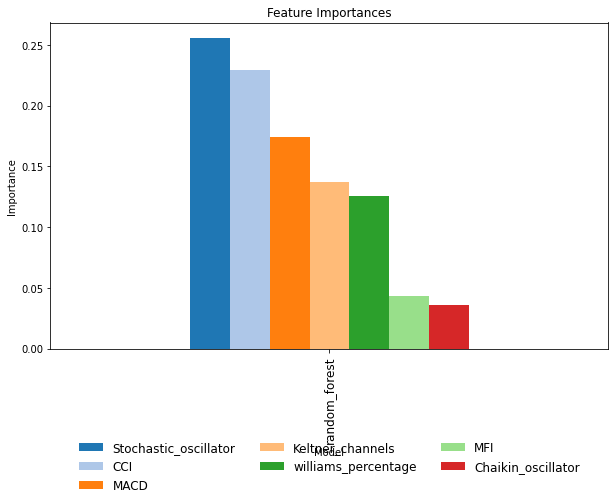

In [15]:
cmap = cm.get_cmap('tab20')
num_legends = 18
colors = [cmap(i) for i in range(num_legends)]

fig, ax = plt.subplots(figsize=(10,6))
feature_importance.plot(kind='bar', ax=ax, color=colors)
ax.set_title('Feature Importances')
ax.set_xlabel('Model')
ax.set_ylabel('Importance')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=3, fontsize = 12, frameon=False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.show()

In [16]:
model = best_estimators['logistic_regression']
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.71875

In [22]:
res = pd.DataFrame()
X_test.reset_index(inplace = True)
res['timestamp'] = X_test['timestamp']
res['signal'] = y_pred

In [18]:
#res.drop('dates', axis = 1, inplace = True)

In [23]:
res.to_csv('predicted_signal_optimized.csv')